# **Milestone 3: Machine Learning**

# **Statement of the Business Problem:**
Football clubs are constantly searching for new players to improve their teams, and the financial stakes are high in these decisions. A player's transfer fee, along with their historical performance data, can give valuable insight into whether they are likely to succeed at a new club. The goal of this project is to develop a machine learning model that predicts the performance success of football players at new clubs based on their transfer value, historical performance data, and additional match data. The ultimate goal is to help clubs identify key factors that drive a player’s success in terms of goals, assists, or overall performance ratings. Understanding these predictors can help teams make more informed investment decisions when scouting new players.

## **Data Cleaning and Data Munging:**
To ensure the quality of the data, several data preprocessing steps were undertaken:


1.   Handling Missing Values: For any missing or blank values in the dataset, a value of 0 was imputed. In fields representing a numerical stat e.g., zero goals or assists rather than an absence of data, I put 0 in these places. This approach allowed for a complete dataset without introducing any unintended distortions.
2.   Missing columns due to unavailability of data: The data was collected for the past decade, some columns were only present in the newer data, reflecting recent additions to football metrics. After evaluating their relevance to the analysis, these columns were removed to maintain consistency across the dataset. This decision ensured that these columns did not skew or impact the exploratory data analysis.
3.  Standardizing player positions by refining terms that were either incorrect or overly specific. For instance, I replaced "left center midfielder" with the more standardized "central midfielder" and combined positions like "back midfielder" and "defensive midfielder" under "central defensive midfielder". These adjustments ensured consistency across data, supporting a more accurate analysis of player roles.



# **Exploratory data analysis:**


1.   Analysed the number of foreign players in each league and came to the conclusion that richer leagues like the English Premier league often had more foreign players. Additionally, leagues in countries with smaller populations, where players may hold multiple nationalities—such as Scotland, Belgium, and Portugal—also showed an increased presence of foreign players. This trend highlights how league wealth and nationality policies impact player demographics.
2.  I identified the top 10 highest transfer fees and found out that attackers and attacking midfielders tend to command the highest market values. This reflects the premium placed on players who contribute directly to goal-scoring and offensive play.
3.  I analyzed the players with the most goals and assists, noting that their market values were also among the highest, reflecting the premium placed on offensive contributions in transfer markets
4.  I analyzed the players with the most yellow and red cards and found that central defenders tended to accumulate the most disciplinary penalties.
5.  I analyzed the trend in the market valuation of Vinícius Júnior, considered the best player in the world, and observed how his transfer value increased over time, particularly as he won major tournaments and achieved significant success with his club.

# **Research Question:**
Machine learning model to predict the success of football teams in a league based on performance metrics such as possession, expected goals, defensive actions, and other team-specific data, while also considering how player transfers impact a team's overall performance? Specifically, which team and player performance metrics are most strongly correlated with a team’s success, and how does the addition or departure of a player influence a team's future performance?

**Predictor Variables:**

**Team-level metrics:**
Possession
Expected goals (xG)
Defensive actions (e.g., tackles, interceptions, blocks)
Other team-specific performance metrics (e.g., passing accuracy, shots on target)

**Player-level metrics:**
Player performance metrics from both the previous and current teams (goals, assists, match actions and other metrics related to a particular position of a player, etc.)
Transfer-related information (player transfer value, position, role)
Contextual factors (e.g., league, season, etc.)



**Response Variable:**

**Team success metric:**
Final league position (e.g., rankings)
Number of points earned (for classification) or goals scored/allowed (for regression)
Any performance outcome metric indicating success (e.g., win rate, goal difference, or number of wins) based on team performance in the league after player transfers

# **Analysis Approach:**

# **Feature Engineering**



**1.  Team Metrics : **


*   Normalization/Scaling: I will normalize continuous features (e.g., possession percentage, expected goals, defensive actions) to bring them onto the same scale and avoid bias from any particular variable.

*   I will aggregate team-level performance metrics (such as possession, expected goals, defensive actions, etc.) for each team over multiple matches in a season. These will serve as predictors for overall team success.
*   Team performance against tougher and weaker opponents: With the use of past season league rankings and performance data in kaggle and scraped data from Fbref I will calculate the performance change when a team plays against tougher opponents and weaker opponents.



**2.  Player Performance Metrics :**

*   From the Kaggle dataset and scraped player data, I will extract individual player performance metrics such as goals, assists, average match ratings, and minutes played.
*   For each player, I will calculate the change in performance after a transfer to a new team. For example, how a player's goals and assists before and after transfer affect the team's overall performance.

*   Player’s Transfer-related Data: I will also include features like the player’s transfer fee, position, and transfer timing (e.g., mid-season vs. pre-season). This will help understand how much the cost and timing of transfers affect team success.

**3.  Binning/Thresholding:**

For variables such as player age or transfer value, I may apply binning or thresholding to categorize players into groups (e.g., high-value transfers vs. low-value transfers). This may help to analyze the impact of different transfer value groups on team performance.

**4. Time-based Features:**

Since football performance data is time-dependent, I will create features that capture the trend over time (e.g., moving averages of performance metrics). This helps track improvement or decline in performance during a season and after player transfers.

**5. Feature Interaction:**

I will create interaction features between team-level performance and player-level performance (e.g., how much a top-performing player contributes to the team's overall success). This will help capture the synergistic effect between individual player transfers and overall team performance.

**6. Player Transfers Impact:**

I will create a difference metric that compares a player's performance at the new club with their performance at the old club. For example, if a player scores 10 goals at their old club and 15 at the new club, this difference will help assess how a player's transfer impacts the new team’s success.

**7. Transfer-related factors: **
A feature indicating whether the player joined the team during the mid-season transfer window vs. pre-season will be added to see if this affects team performance differently.











# **Modeling:**



**1.   Supervised Learning:**

Given that the goal is to predict a team's success, I will start with supervised learning models such as Random Forest, Gradient Boosting Machines (GBM), and XGBoost to predict continuous outcomes like goals scored, or classification models (e.g., Logistic Regression, SVM) for team success (win/loss).

**2.   Feature Selection:**

I will employ Recursive Feature Elimination (RFE) or Lasso regression to select the most important predictors and avoid overfitting.

**3. Feature Importance Analysis:**

For models like Random Forest and XGBoost, I will use feature importance analysis to assess which factors (e.g., transfer fee, player’s previous performance) are most predictive of team success.

**4. Model Evaluation:**

Cross-validation: To ensure that the model generalizes well, I will use k-fold cross-validation.



# **Preliminary Results:**

Loading the La Liga standings table where I have already aggregated and calculated the performance metrics for each team. We will analyze this table with the final league standings along with perofrmance metrics.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
url="/content/drive/MyDrive/Scrape_output/LaLiga/2023-2024-La-Liga-Stats.xlsx"
LaLigaStandings = pd.read_excel(url)
LaLigaStandings.head(10)

,rank,team,games,wins,ties,losses,goals_for,goals_against,goal_diff,points,points_avg,xg_for,xg_against,xg_diff,xg_diff_per90,attendance_per_g,top_team_scorers,top_keeper,notes
0,1,Real Madrid,38,29,8,1,87,26,61,95,2.50,68.8,35.4,33.4,0.88,"72,061",Jude Bellingham - 19,Andriy Lunin,→ Champions League via league finish
1,2,Barcelona,38,26,7,5,79,44,35,85,2.24,77.6,41.6,35.9,0.94,"39,846",Robert Lewandowski - 19,Marc-André ter Stegen,→ Champions League via league finish
2,3,Girona,38,25,6,7,85,46,39,81,2.13,70.8,54.3,16.5,0.43,"12,520",Artem Dovbyk - 24,Paulo Gazzaniga,→ Champions League via league finish
3,4,Atlético Madrid,38,24,4,10,70,43,27,76,2.00,62.4,39.5,23.0,0.60,"59,121",Antoine Griezmann - 16,Jan Oblak,→ Champions League via league finish
4,5,Athletic Club,38,19,11,8,61,37,24,68,1.79,52.7,41.3,11.4,0.30,"46,112",Gorka Guruzeta - 14,Unai Simón,→ Europa League via cup win
5,6,Real Sociedad,38,16,12,10,51,39,12,60,1.58,44.9,41.3,3.6,0.10,"31,710",Mikel Oyarzabal - 9,Álex Remiro,→ Europa League via league finish
6,7,Betis,38,14,15,9,48,45,3,57,1.50,43.9,50.2,-6.3,-0.17,"51,259",Willian José - 10,Rui Silva,→ Europa Conference League via league finish
7,8,Villarreal,38,14,11,13,65,65,0,53,1.39,55.6,58.7,-3.2,-0.08,"17,957",Alexander Sørloth - 23,Filip Jørgensen,NaN
8,9,Valencia,38,13,10,15,40,45,-5,49,1.29,43.1,47.6,-4.5,-0.12,"43,420",Hugo Duro - 13,Giorgi Mamardashvili,NaN
9,10,Alavés,38,12,10,16,36,46,-10,46,1.21,46.2,44.7,1.5,0.04,"17,391",Samu Omorodion - 8,Antonio Sivera,NaN


In [15]:
# Correlation between xG for and points
print(LaLigaStandings[['xg_for', 'points']].corr())


          xg_for    points
xg_for  1.000000  0.815859
points  0.815859  1.000000


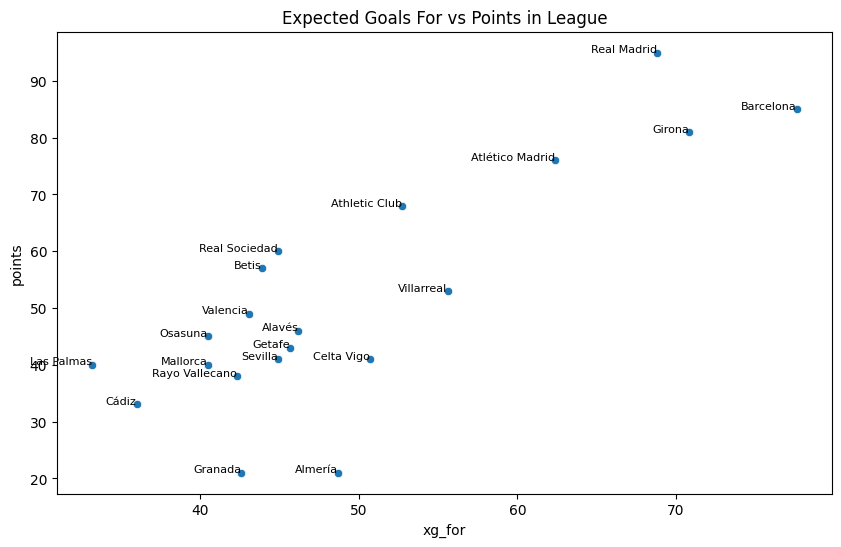

In [22]:
# Scatter plot of xG for vs. Points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='xg_for', y='points', data=LaLigaStandings)

for i in range(len(LaLigaStandings)):
    plt.text(LaLigaStandings['xg_for'][i], LaLigaStandings['points'][i], LaLigaStandings['team'][i],
             horizontalalignment='right', size=8, color='black')

plt.title('Expected Goals For vs Points in League')
plt.show()


**Result: **The scatter plot reveals that teams with higher expected goals (xG) tend to be the stronger performers in the league, consistently outperforming other teams.

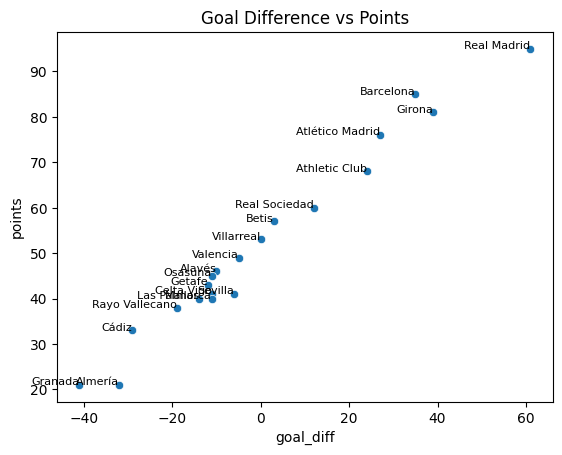

In [27]:
# Scatter plot of goal difference vs. Points
sns.scatterplot(x='goal_diff', y='points', data=LaLigaStandings)
for i in range(len(LaLigaStandings)):
    plt.text(LaLigaStandings['goal_diff'][i], LaLigaStandings['points'][i], LaLigaStandings['team'][i],
             horizontalalignment='right', size=8, color='black')

plt.title('Goal Difference vs Points')
plt.show()


The teams that have the higher goal difference (That is more goals scored while conceding the least amount) is clearly the better performer in the league.

**Feature Engineering:**
While I have created features for Xg, possession, goals for, against and their difference. We can also create win_rate and goals per game metrics

In [30]:
LaLigaStandings['win_rate'] = LaLigaStandings['wins'] / LaLigaStandings['games']
LaLigaStandings['goals_per_game'] = LaLigaStandings['goals_for'] / LaLigaStandings['games']


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select predictor variables and response variable
X = LaLigaStandings[['xg_for', 'goal_diff', 'goals_per_game']]  # Add any additional relevant features
y = LaLigaStandings['points']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  20.60266119177221


# **Hypothesis Testing:**
Test Setup:
1. Defining hypothesis:

Null Hypothesis (H0): There is no significant relationship between the number of progressive passes by midfielders and the goal-scoring/xG of forwards.


Alternative Hypothesis (Ha): There is a significant positive relationship between the number of progressive passes by midfielders and the goal-scoring/xG of forwards.


In [35]:
player_data = pd.read_excel("/content/drive/MyDrive/Scrape_output/LaLiga/2023-2024-La-Liga-Statsplayers.xlsx")
player_data['position'] = player_data['position'].fillna('')
player_data.head(1)

,ranker,player,nationality,position,team,age,birth_year,games,games_starts,minutes,...,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,matches
0,1,Nabil Aberdin,fr FRA,DF,Getafe,20.0,2002.0,2.0,2.0,180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches


In [38]:
midfielders = player_data[player_data['position'].str.contains('MF')]
forwards = player_data[player_data['position'].str.contains('FW')]
# Group by team to get the average or sum of progressive passes by midfielders
team_midfield_progression = midfielders.groupby('team')['progressive_passes'].mean()

# Merge with forwards data based on team
forwards = forwards.merge(team_midfield_progression, on='team', suffixes=('', '_midfield_avg'))

In [39]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation
corr_goals, p_value_goals = pearsonr(forwards['progressive_passes_midfield_avg'], forwards['goals'])
corr_xg, p_value_xg = pearsonr(forwards['progressive_passes_midfield_avg'], forwards['xg'])

print(f'Correlation with goals: {corr_goals}, P-value: {p_value_goals}')
print(f'Correlation with xG: {corr_xg}, P-value: {p_value_xg}')


Correlation with goals: 0.2554386360100106, P-value: 0.00015826895417723577
Correlation with xG: 0.20763126195523393, P-value: 0.0022661569090074666


**Correlation with Goals:** The correlation coefficient is approximately 0.255 with a p-value of 0.0002. This positive correlation suggests a modest association between the number of progressive passes by midfielders and the number of goals scored by forwards. Given the low p-value, this relationship is statistically significant

**Correlation with xG (Expected Goals):** The correlation coefficient here is 0.208 with a p-value of 0.0023. This shows a weaker but still statistically significant positive correlation between progressive passes by midfielders and the xG of forwards, indicating that better distribution and forward-supporting passes by midfielders are modestly associated with higher-quality goal-scoring opportunities for forwards.

**These findings align with the hypothesis that increased progressive passes by midfielders contribute positively to forwards' goal-scoring opportunities and outcomes.**

# **Plan for Final Analysis:**
For the final analysis, I plan to refine the model's understanding of player success at a new club by focusing on the performance metrics that influence both individual player success and team success.

**Scale:** I will utilize all available player performance data across multiple leagues, spanning several seasons. This will provide a robust dataset to capture various factors that may influence player outcomes, with a focus on critical metrics like goals, assists, expected goals (xG), and progressive passes. Additionally, I’ll incorporate team-level data to analyze how these metrics correlate with team success indicators, such as league standings, points, and goal differentials.

**Model Complexity:** Given the need to capture nonlinear relationships between player performance and team metrics, I plan to use a mix of regression and classification models:

*   Regression Models (e.g., linear regression, random forest regressors) to quantify how player-level metrics (goals, xG) are influenced by midfield metrics (like progressive passes).
*   Clustering to identify player types based on their performance metrics and how these impact different teams.


*   Random Forests or Gradient Boosting Models for identifying and ranking feature importance, especially useful for determining which metrics most influence player success.

**Tools:**



*   Python for data handling and model development, using libraries like pandas, scikit-learn, and statsmodels for hypothesis testing and regression analysis.
*   Machine Learning Libraries like scikit-learn for supervised and unsupervised models and xgboost or lightgbm for gradient boosting methods.

*   Visualization tools (matplotlib, seaborn) to represent correlations, feature importance, and regression outputs.







**Processing Time:** Since the data size is manageable, initial model training and evaluation should be relatively efficient, with most models expected to complete in a reasonable timeframe.










